In [1]:
import numpy as np
import pandas as pd

from luwiji.text_proc import illustration, demo
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

/home/naufalabdila/miniconda3/envs/jlml/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/naufalabdila/miniconda3/envs/jlml/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
text = demo.text
text

['Ini adalah pensil, tapi itu adalah pulpen',
 'Itu adalah pensil.',
 'Saya mau beli pulpen.',
 'Saya ada pulpen itu, tapi tidak ada pensil itu.',
 'Saya tidak ada pensil ini',
 'Saya mau beli pulpen dan pensil',
 'Ini adalah pulpen']

# Bag of Words 

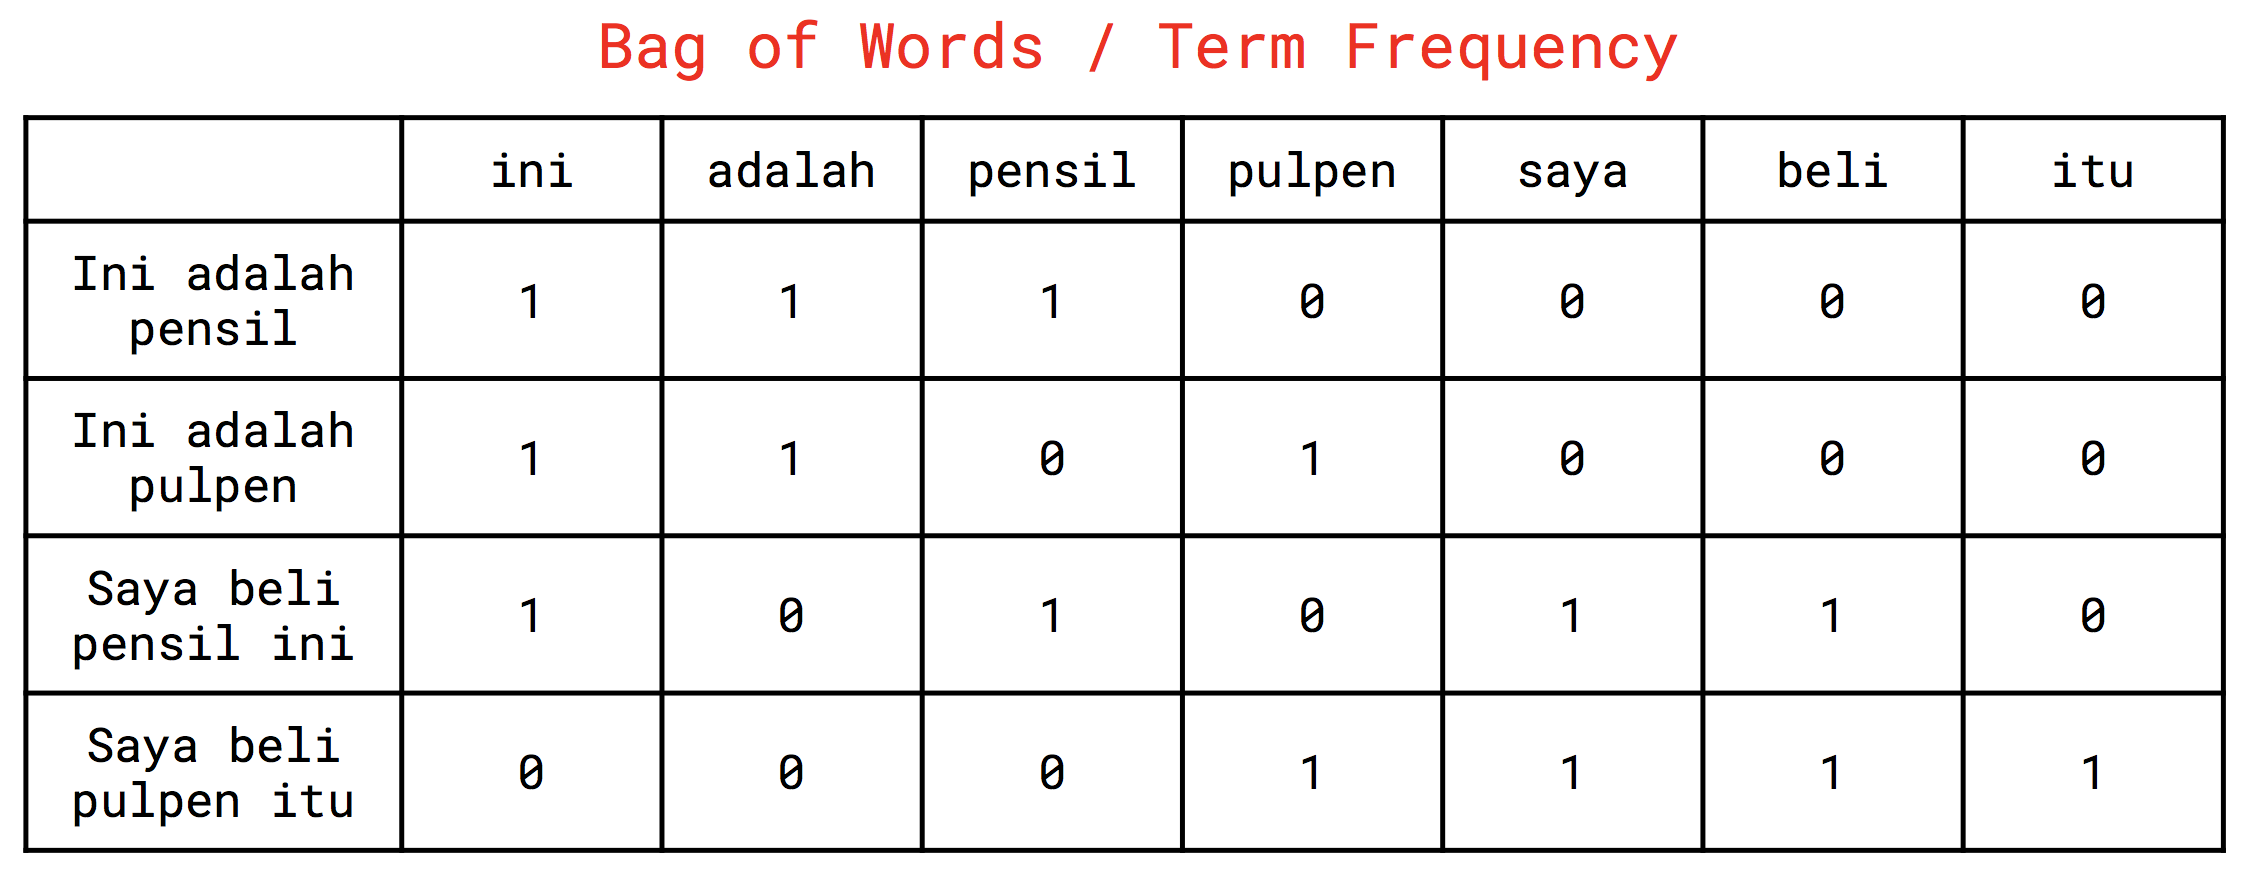

In [3]:
illustration.bag_of_words

In [4]:
bow = CountVectorizer()
bow_matrix = bow.fit_transform(text)

In [6]:
bow_matrix.toarray()

array([[0, 2, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0],
       [0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0],
       [2, 0, 0, 0, 0, 2, 0, 1, 1, 1, 1, 1],
       [1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1],
       [0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0],
       [0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0]])

In [7]:
pd.DataFrame(bow_matrix.toarray(), columns=bow.get_feature_names(), index=text)

,ada,adalah,beli,dan,ini,itu,mau,pensil,pulpen,saya,tapi,tidak
"Ini adalah pensil, tapi itu adalah pulpen",0,2,0,0,1,1,0,1,1,0,1,0
Itu adalah pensil.,0,1,0,0,0,1,0,1,0,0,0,0
Saya mau beli pulpen.,0,0,1,0,0,0,1,0,1,1,0,0
"Saya ada pulpen itu, tapi tidak ada pensil itu.",2,0,0,0,0,2,0,1,1,1,1,1
Saya tidak ada pensil ini,1,0,0,0,1,0,0,1,0,1,0,1
Saya mau beli pulpen dan pensil,0,0,1,1,0,0,1,1,1,1,0,0
Ini adalah pulpen,0,1,0,0,1,0,0,0,1,0,0,0


# TF-IDF (Term Frequency - Inverse Document Frequency) 

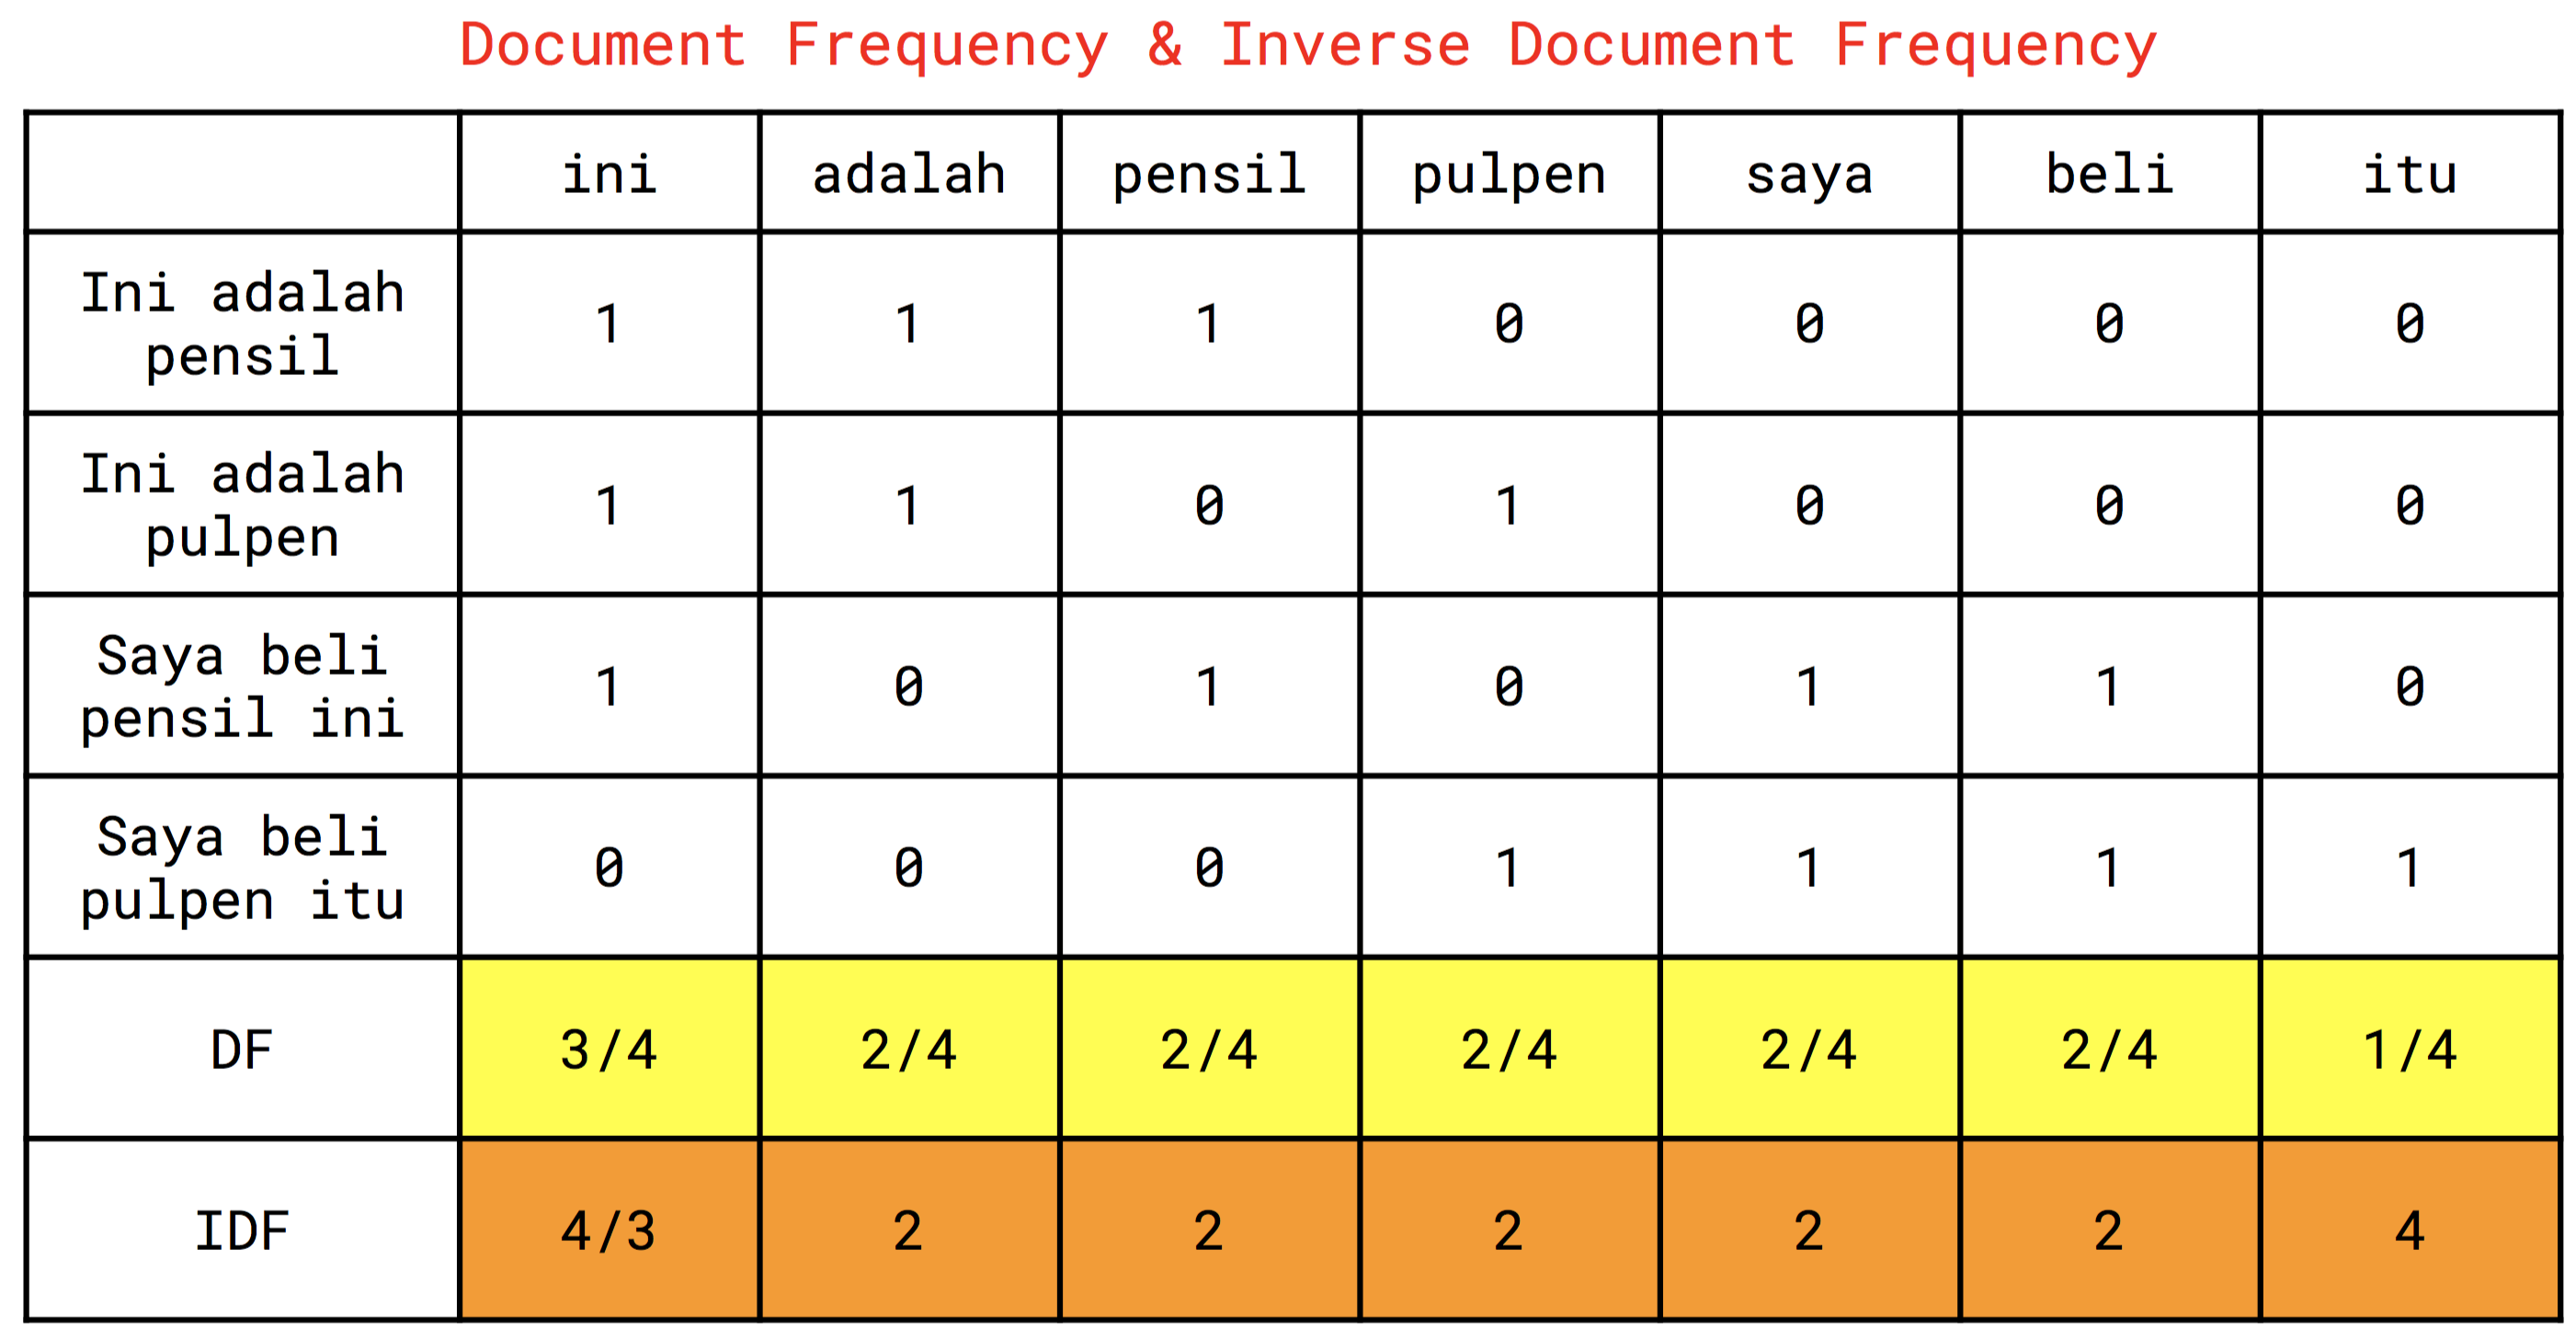

In [8]:
# disini kita baru mendapatkan IDF nya saja
illustration.inverse_df

TD-IDF = BOW * IDF, disini IDF bertindak sebagai bobot sehingga yang awalnya BOW hanya melihat jumlah kemunculan kata sekarang dengan TDIDF kita juga memperhatikan sebarapa penting suatu kata terhadap seluruh dokumen kita.

In [10]:
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(text)

In [11]:
tfidf_matrix.toarray()

array([[0.        , 0.68496816, 0.        , 0.        , 0.34248408,
        0.34248408, 0.        , 0.26046797, 0.26046797, 0.        ,
        0.40067544, 0.        ],
       [0.        , 0.62276601, 0.        , 0.        , 0.        ,
        0.62276601, 0.        , 0.4736296 , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.57993393, 0.        , 0.        ,
        0.        , 0.57993393, 0.        , 0.37699894, 0.43037782,
        0.        , 0.        ],
       [0.62262022, 0.        , 0.        , 0.        , 0.        ,
        0.53219512, 0.        , 0.20237405, 0.20237405, 0.23102798,
        0.31131011, 0.31131011],
       [0.51959759, 0.        , 0.        , 0.        , 0.4441348 ,
        0.        , 0.        , 0.33777596, 0.        , 0.38560131,
        0.        , 0.51959759],
       [0.        , 0.        , 0.45420718, 0.54718095, 0.        ,
        0.        , 0.45420718, 0.29526747, 0.29526747, 0.33707408,
        0.        ,

In [13]:
pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names(), index=text)

,ada,adalah,beli,dan,ini,itu,mau,pensil,pulpen,saya,tapi,tidak
"Ini adalah pensil, tapi itu adalah pulpen",0.000000,0.684968,0.000000,0.000000,0.342484,0.342484,0.000000,0.260468,0.260468,0.000000,0.400675,0.000000
Itu adalah pensil.,0.000000,0.622766,0.000000,0.000000,0.000000,0.622766,0.000000,0.473630,0.000000,0.000000,0.000000,0.000000
Saya mau beli pulpen.,0.000000,0.000000,0.579934,0.000000,0.000000,0.000000,0.579934,0.000000,0.376999,0.430378,0.000000,0.000000
"Saya ada pulpen itu, tapi tidak ada pensil itu.",0.622620,0.000000,0.000000,0.000000,0.000000,0.532195,0.000000,0.202374,0.202374,0.231028,0.311310,0.311310
Saya tidak ada pensil ini,0.519598,0.000000,0.000000,0.000000,0.444135,0.000000,0.000000,0.337776,0.000000,0.385601,0.000000,0.519598
Saya mau beli pulpen dan pensil,0.000000,0.000000,0.454207,0.547181,0.000000,0.000000,0.454207,0.295267,0.295267,0.337074,0.000000,0.000000
Ini adalah pulpen,0.000000,0.622766,0.000000,0.000000,0.622766,0.000000,0.000000,0.000000,0.473630,0.000000,0.000000,0.000000


'adalah' muncul di 3 dokumen dari total 7 dokumen dan pada dokumen `Ini adalah pensil, tapi itu adalah pulpen` kata tersebut muncul 2 kali.

TFIDF juga memiliki kekurangan dimana tidak bisa menangkap konteks dari dokumen.

# N-gram 

Untuk mencakup informasi urutan kata.

In [14]:
tfidf_ngram = TfidfVectorizer(ngram_range=(1, 3))
tfidf_ngram_matrix = tfidf_ngram.fit_transform(text)

In [15]:
pd.DataFrame(tfidf_ngram_matrix.toarray(), columns=tfidf_ngram.get_feature_names(), index=text)

,ada,ada pensil,ada pensil ini,ada pensil itu,ada pulpen,ada pulpen itu,adalah,adalah pensil,adalah pensil tapi,adalah pulpen,...,saya tidak,saya tidak ada,tapi,tapi itu,tapi itu adalah,tapi tidak,tapi tidak ada,tidak,tidak ada,tidak ada pensil
"Ini adalah pensil, tapi itu adalah pulpen",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.378609,0.221469,0.266803,0.221469,...,0.000000,0.000000,0.221469,0.266803,0.266803,0.000000,0.000000,0.000000,0.000000,0.000000
Itu adalah pensil.,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.370062,0.432940,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Saya mau beli pulpen.,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"Saya ada pulpen itu, tapi tidak ada pensil itu.",0.360762,0.180381,0.000000,0.217304,0.217304,0.217304,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.180381,0.000000,0.000000,0.217304,0.217304,0.180381,0.180381,0.180381
Saya tidak ada pensil ini,0.282740,0.282740,0.340615,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.340615,0.340615,0.000000,0.000000,0.000000,0.000000,0.000000,0.282740,0.282740,0.282740
Saya mau beli pulpen dan pensil,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Ini adalah pulpen,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.370062,0.000000,0.000000,0.432940,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
